In [21]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# For loading and converting images
from tensorflow.keras.utils import load_img, img_to_array


In [22]:
# Dataset paths
train_dir = r"C:\Users\HARSH\Desktop\DS\exp_7\train"
test_dir = r"C:\Users\HARSH\Desktop\DS\exp_7\test"

# CSV paths
test_csv = r"C:\Users\HARSH\Desktop\DS\exp_7\Testing_set_flower.csv"


In [23]:
# Image Data Generator with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2   # 20% validation split
)

# Load training data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Load validation data
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 2198 images belonging to 5 classes.
Found 548 images belonging to 5 classes.


In [24]:
num_classes = len(train_generator.class_indices)

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,285 (12.61 MB)

 Trainable params: 3,305,285 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
# Get number of classes from the train generator
num_classes = len(train_generator.class_indices)

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(2,2),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,285 (12.61 MB)

 Trainable params: 3,305,285 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
callbacks = [
    EarlyStopping(patience=5, restore_best_weights=True),
    ModelCheckpoint("flower_model.h5", save_best_only=True)
]

history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=20,
    callbacks=callbacks
)


Epoch 1/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step - accuracy: 0.3205 - loss: 1.5130

69/69 ━━━━━━━━━━━━━━━━━━━━ 24s 326ms/step - accuracy: 0.3913 - loss: 1.3862 - val_accuracy: 0.4544 - val_loss: 1.2741
Epoch 2/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step - accuracy: 0.5010 - loss: 1.1942

69/69 ━━━━━━━━━━━━━━━━━━━━ 24s 342ms/step - accuracy: 0.5077 - loss: 1.1759 - val_accuracy: 0.5128 - val_loss: 1.1690
Epoch 3/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step - accuracy: 0.5564 - loss: 1.1292

69/69 ━━━━━━━━━━━━━━━━━━━━ 24s 342ms/step - accuracy: 0.5655 - loss: 1.1036 - val_accuracy: 0.5766 - val_loss: 1.0890
Epoch 4/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step - accuracy: 0.6093 - loss: 1.0257

69/69 ━━━━━━━━━━━━━━━━━━━━ 23s 337ms/step - accuracy: 0.6033 - loss: 1.0166 - val_accuracy: 0.5985 - val_loss: 1.0019
Epoch 5/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step - accuracy: 0.6270 - loss: 0.9874

69/69 ━━━━━━━━━━━━━━━━━━━━ 23s 336ms/step - accuracy: 0.6278 - loss: 0.9583 - val_accuracy: 0.5912 - val_loss: 0.9280
Epoch 6/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 23s 335ms/step - accuracy: 0.6419 - loss: 0.9233 - val_accuracy: 0.5858 - val_loss: 0.9683
Epoch 7/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 24s 341ms/step - accuracy: 0.6424 - loss: 0.9076 - val_accuracy: 0.6040 - val_loss: 0.9740
Epoch 8/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step - accuracy: 0.6724 - loss: 0.8518

69/69 ━━━━━━━━━━━━━━━━━━━━ 23s 338ms/step - accuracy: 0.6761 - loss: 0.8426 - val_accuracy: 0.6515 - val_loss: 0.8722
Epoch 9/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 23s 331ms/step - accuracy: 0.6761 - loss: 0.8290 - val_accuracy: 0.6369 - val_loss: 0.9471
Epoch 10/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 25s 359ms/step - accuracy: 0.6929 - loss: 0.8060 - val_accuracy: 0.6296 - val_loss: 0.9163
Epoch 11/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 24s 350ms/step - accuracy: 0.6852 - loss: 0.8274 - val_accuracy: 0.6460 - val_loss: 0.8947
Epoch 12/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step - accuracy: 0.6848 - loss: 0.8182

69/69 ━━━━━━━━━━━━━━━━━━━━ 25s 356ms/step - accuracy: 0.7043 - loss: 0.7948 - val_accuracy: 0.6715 - val_loss: 0.8135
Epoch 13/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step - accuracy: 0.6946 - loss: 0.8067

69/69 ━━━━━━━━━━━━━━━━━━━━ 25s 363ms/step - accuracy: 0.7015 - loss: 0.7668 - val_accuracy: 0.6861 - val_loss: 0.7842
Epoch 14/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step - accuracy: 0.7165 - loss: 0.7538

69/69 ━━━━━━━━━━━━━━━━━━━━ 23s 336ms/step - accuracy: 0.7170 - loss: 0.7585 - val_accuracy: 0.6843 - val_loss: 0.7748
Epoch 15/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 25s 355ms/step - accuracy: 0.7216 - loss: 0.7193 - val_accuracy: 0.6898 - val_loss: 0.7761
Epoch 16/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 25s 365ms/step - accuracy: 0.7429 - loss: 0.7071 - val_accuracy: 0.6880 - val_loss: 0.7839
Epoch 17/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 25s 365ms/step - accuracy: 0.7161 - loss: 0.7242 - val_accuracy: 0.6807 - val_loss: 0.7807
Epoch 18/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step - accuracy: 0.7480 - loss: 0.6591

69/69 ━━━━━━━━━━━━━━━━━━━━ 24s 350ms/step - accuracy: 0.7343 - loss: 0.6835 - val_accuracy: 0.6825 - val_loss: 0.7499
Epoch 19/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 24s 342ms/step - accuracy: 0.7416 - loss: 0.6782 - val_accuracy: 0.6807 - val_loss: 0.8181
Epoch 20/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step - accuracy: 0.7298 - loss: 0.6706

69/69 ━━━━━━━━━━━━━━━━━━━━ 24s 345ms/step - accuracy: 0.7379 - loss: 0.6691 - val_accuracy: 0.7208 - val_loss: 0.7087


In [27]:
test_df = pd.read_csv(test_csv)
test_df.head()


,filename
0,Image_1.jpg
1,Image_2.jpg
2,Image_3.jpg
3,Image_4.jpg
4,Image_5.jpg


In [ ]:
from tensorflow.keras.utils import load_img, img_to_array 

img_size = (128, 128)
test_images = []

for fname in test_df['filename']:
    img_path = os.path.join(test_dir, fname)
    img = load_img(img_path, target_size=img_size)          
    img_array = img_to_array(img) / 255.0                   
    test_images.append(img_array)

test_images = np.array(test_images)
print("Test images shape:", test_images.shape)


Test images shape: (924, 128, 128, 3)


In [29]:
# Load trained model
model = load_model("flower_model.h5")

# Predict
predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)

# Map numeric classes to labels
labels = {v:k for k,v in train_generator.class_indices.items()}
predicted_labels = [labels[k] for k in predicted_classes]

# Save predictions to CSV
test_df['predicted_label'] = predicted_labels
test_df.to_csv("flower_test_predictions.csv", index=False)
print("Predictions saved to flower_test_predictions.csv")


29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step
Predictions saved to flower_test_predictions.csv


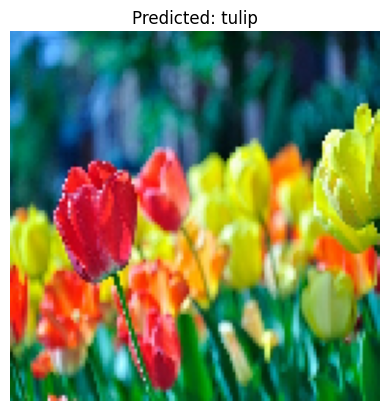

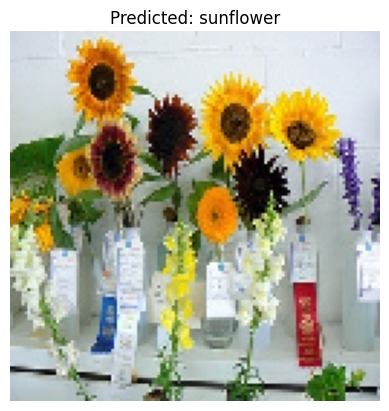

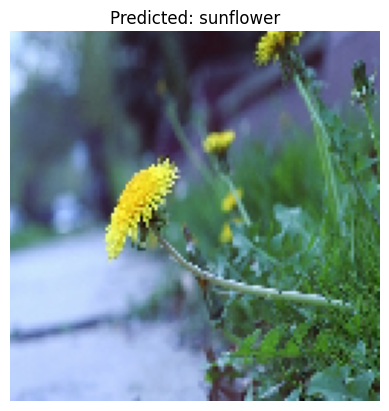

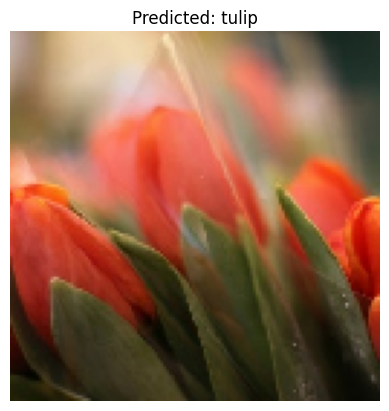

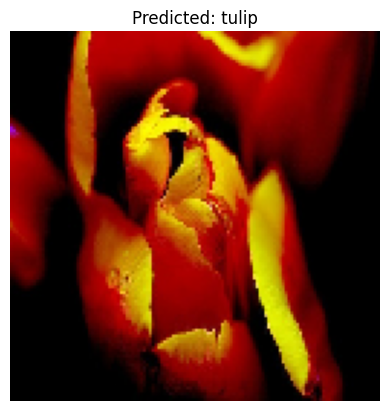

In [32]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img
import random
import os

# Load predictions
preds = pd.read_csv("flower_test_predictions.csv")

# Pick 5 random samples from predictions
sample = preds.sample(5, random_state=42)

# Show images with predicted labels
for idx, row in sample.iterrows():
    img_path = os.path.join(test_dir, row['filename'])
    img = load_img(img_path, target_size=(128,128))
    
    plt.imshow(img)
    plt.title(f"Predicted: {row['predicted_label']}")
    plt.axis("off")
    plt.show()
